(ch:probability-continuous)=
# 연속확률분포

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/statsRev/tree/master/data)를 지정한다.

In [5]:
data_url = 'https://raw.githubusercontent.com/codingalzi/statsRev/refs/heads/master/data/'

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`로,
`seaborn`을 `sns`로 불러온다.
`seaborn` 라이브러리는 통계 관련 데이터의 정보를 보다 세련되고 정확하게 전달하는 그래프를 그리는 도구를 제공한다.
`matplotlib` 라이브러리를 바탕으로 만들어져서 함께 사용해도 된다.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

그래프 스타일을 `seaborn`에서 제공하는 `white` 스타일로 지정한다.

In [7]:
sns.set_style("white")

**주요 내용**

연속확률분포의 주요 개념을 소개한다.

- 연속확률변수
- 누적분포함수
- 확률밀도함수
- 커널밀도추정
- 결합확률분포

## 연속확률변수

{numref}`%s장 <ch:probability-discrete>`에서 살펴 본 이산확률변수는
$x_1$, $x_2$, $x_3$ ... 등의 형식으로 하나, 둘, 셋 하며 셀 수 있는
**이산형 값**<font size='2'>discrete value</font>을 취한다.
반면에 **연속확률변수**<font size='2'>continuous random variable</font>는
일정 구간에 속한 임의의 실수를 가리킨다.
여기서 구간은 구간 [0,1]처럼 구간 길이가 유한할 수도 있지만
0보다 큰 모든 실수 또는 모든 실수처럼 무한할 수도 있다.
예를 들어, 캘리포니아 주택가격 데이터셋에 포함된 구역들의 가구소득은
0.4999에서 15.0001 사이의 실수로 구성되고, 대학생의 학점 평균으로 구성된 데이터셋은 0에서 4.5 사이의 실수로 구성된다.

:::{admonition} 실수와 부동소수점
:class: note

프로그래밍에서 실수는 부동소수점으로 표현된다.
부동소수점은 엄밀히 말해 유한소수만 다루지만 여기서는 특별한 의미 없이 실수라는 표현을 사용한다.
:::

**이산확률분포 대 연속확률분포**

이산확률분포는 확률변수가 특정 값을 가리킬 확률을 표 형식으로 표현한다.
예를 들어 아래 표는 정상적인 주사위 하나를 던졌을 때 나오는 값으로 정의된 확률변수 $X$의 확률분포이다.

| X | 1 | 2 | 3 | 4 | 5 | 6|
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |

그리고 {numref}`%s장 <ch:probability-discrete>`에서 살펴본 아래 표는 캘리포니아 주택가격 데이터셋에서 임의로 선택된 구역의 가구소득 범주를 가리키는 확률변수 $X$의 확률분포이다. 가구소득 0에서 1.5까지의 구간이 가구소득 범주 1에 해당하고, 1.5에서 3.0, 3.0에서 4.5, 4.5에서 6, 6 이상이 가구소득 범주 2부터 5까지의 구간에 해당한다.

| X | 1 | 2 | 3 | 4 | 5 |
| :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 0.041372 | 0.333011 | 0.361017 | 0.177992 | 0.086607 |

연속확률변수가 따르는 확률분포를 **연속확률분포**<font size='2'>continuous probability distribution</font>라 하는데,
연속확률분포는 확률변수가 특정 값을 취할 확률을 계산할 수 없고
특정 구간의 값을 취할 확률만을 계산할 수 있다.
연속확률변수 $X$가 특정 실수 $x$를 취할 확률은 항상 0이기 때문이다

$$
P(X=x) = 0
$$

예를 들어 0과 1 사이의 실수 중에서 무작위로 하나의 값을 취했을 때 그 값이 정확히 0.5일 확률 또는 캘리포니아 주택가격 데이터셋에서 임의로 선택된 구역의 가구소득이 정확히 1.999999일 확률은 모두 0이다.
반면에, 0과 1 사이에서 무작위로 선택한 값을 갖는 연속확률변수가
특정 구간, 예를 들어 0.49에서 0.51 사이의 구간에 속하는 값을 취했을
확률은 0.02, 즉 2% 이다.
구간 전체의 길이가 1인데 0.49에서 0.51 사이 구간의 길이는 0.02이기 때문이다.
마찬가지로, 캘리포니아 주택가격 데이터셋에서 임의로 선택된 구역의 가구소득이
1.5에서 3.0 사이일 확률은 가구소득이 2구간에 속할 확률, 즉 0.333011이다.

이처럼 연속확률변수는 아래 표현식처럼 특정 구간의 값을 취할 확률을 계산한다.

$$
P(a \le X \le b)
$$

또한, 연속확률변수가 특정 값을 취할 확률은 0이므로 구간의 끝 포함 여부는 중요하지 않으므로 아래 식에서처럼 등호 기호는 생략해도 된다.

$$
P(a \le X \le b) = P(a < X < b) = P(a < X \le b) = P(a \le X < b)
$$

## 누적분포함수

0과 1 사이의 실수 중에서 무작위로 하나의 값을 취했을 때 그 값이 구간 $[a, b]$에 속할 확률은 $b-a$임을 바로 알 수 있다.
하지만 연속확률변수가 특정 구간의 값을 취할 확률을
정확하게 계산하는 일이 일반적으로 그렇게 간단하지 않다. 예를 들어 캘리포니아 주택가격 데이터셋에서 임의로 선택된 구역의 가구소득이 2.0에서 2.1 사이일 확률은 쉽게 구할 수 없다. 이 구간이 앞서 언급했던 5개의 구간 어디와도 정확히 일치하지 않기 때문이다.
여기서는 **누적분포함수**<font size='2'>cumulative distribution function</font>(CDF)를 활용하여 연속확률변수가 이런 구간의 값을 취할 확률을 계산하는 방법을 소개한다.


연속확률변수 $X$의 누적분포함수 $F$는
확률변수 $X$가 특정 값보다 같거나 작은 값을 취할 확률을 나타내며, 다음과 같이 정의된다.

$$
F(a) = P(X \le a)
$$

누적분포함수가 알려진 경우, 연속확률변수 $X$가 구간 $[a,b]$에 속할 확률은 다음과 같이 계산된다.


$$
P(a \le X \le b) = F(b) - F(a),
\quad \mbox{ $a \le b$}
$$

**예제: 캘리포니아 구역별 가구소득 확률분포**

확률변수 $X$가 캘리포니아의 구역별 가구소득을 가리킨다고 할 때 임의로 선택된 구역의 가구소득이
특정 값 이하일 확률을 나타내는 누적분포함수 $F$는 부울 인덱싱을 이용하여 정의할 수 있다.

아래 코드는 캘리포니아 주택가격 데이터셋에서
주택가격이 50만을 초과하는 경우는 삭제하고 인덱스를 초기화한 후 가구소득 특성만을 남긴다.

In [8]:
housing = pd.read_csv(data_url+"california_housing_mini.csv")

# 주택가격이 50만1달러 이상인 구역 삭제
house_value_max = housing['median_house_value'].max() # 500,001
mask = housing['median_house_value'] >= house_value_max
housing = housing[~mask]

# 인덱스 초기화
housing = housing.reset_index(drop=True)

# 가구소득 특성만 선택
housing = housing.loc[:, 'median_income']
housing.index.name = 'district'

가구소득<font size='2'>`median_income`</font> 특성만 남아 있다.

In [9]:
housing.info()

<class 'pandas.core.series.Series'>
RangeIndex: 19675 entries, 0 to 19674
Series name: median_income
Non-Null Count  Dtype  
--------------  -----  
19675 non-null  float64
dtypes: float64(1)
memory usage: 153.8 KB


가구소득을 가리키는 연속확률변수 $X$가 특정 값 $a$ 이하의 값을 가질 확률은
가구소득이 $a$보다 같거나 작은 구역의 비율이며,
아래 `F_income()` 함수가 확률변수 $X$에 대한 누적분포함수를 구현한다.

In [10]:
def F_income(a):
    mask = housing <= a # a 보다 같거나 작을 때만 1
    return mask.mean()  # 전체 중에 True 인 지역의 비율

임의의 구역을 선택했을 때 가구소득 범주 2에 속할 확률 $P(1.5 < X \leq 3.0)$를
`F_income()`을 이용하여 계산하면 앞서 언급한 값과 동일하게 나온다.

In [11]:
F_income(3.0) - F_income(1.49999)

0.333367

(sec:continuity-correction)=
### 연속성 보정

위 코드에서 1.5 대신 `1.49999`를 사용한 이유는
연속확률변수라 하더라도 유한 개의 데이터만 있기 때문에
확률변수가 특정 값을 가질 확률이 0이 아닐 수 있기 때문이다. 예를 들어 가구소득이 정확히 1.5일 확률은 0.000356이다.

In [12]:
error = (housing == 1.5).mean()
error

0.000356

이런 이유로 ` F_length(3.0) - F_length(1.5)`는 실제 확률보다 0.000356만큼 작은 값으로 계산된다.

In [13]:
(F_income(3.0) - F_income(1.5)) + error == (F_income(3.0) - F_income(1.49999))

True

결국 $P(a \leq X \leq b)$와 $P(a \lt X \leq b)$ 가 서로 다른 확률을 가질 수 있다.
이런 결과를 보정하기 위해 $a$에서 $10^{-5}$을 뺀 값을 대신 사용한 것인데, 그 이유는 다음과 같다.

가구소득 데이터는 소수점 이하 넷째 자리까지 표현되어 있으므로, $10^{-5}$(0.00001)과 같은 아주 작은 값을 빼주면 데이터셋에 정확히 그 값에 해당하는 가구소득은 존재하지 않는다.
따라서 $a$ 대신 $a - 10^{-5}$ 를 사용하면
`F_income`$(a - 10^{-5})$는 사실상 $P(X < a)$를 계산하는 효과를 갖게 되고,
$P(a \leq X \leq b)$는 `F_income()` 함수를 이용하여 정확하게 계산된다.

이런 연속성 보정은 유한 개의 실전 데이터를 이용해 확률을 계산할 때 항상 고려해야 한다.
연속성 보정을 위해 사용되는 `error`는 사용되는 
주어진 데이터에 따라 적절하게 지정되어야 한다.
연속성 보장의 다른 활용 예제는 {numref}`%s장 <ch:normal-distribution>`에서 살펴본다.

아래 `P_income()` 함수는 임의로 선택된 구역의 가구소득이 특정 구간에 속할 확률을 계산하며
앞서 설명한 연속성 보정을 적용하였다. 코드에 사용된 `assert`문은 뒤에 오는 조건이 참인지 확인하고, 거짓이면 그 이후의 문자열을 에러 메시지로 반환한다.

In [14]:
def P_income(a, b):
    assert a <= b, f'둘째 인자가 첫째 인자보다 같거나 커야 함'

    return F_income(b) - F_income(a - 1.0e-5)

In [15]:
P_income(1.5, 3.0)

0.333367

이제 앞에서의 질문, 즉 임의의 구역을 선택했을 때 가구소득이 2.0에서 2.1 사이일 확률을 구할 수 있다. 약 2.1%로 계산된다.

In [16]:
P_income(2.0, 2.1)

0.021449

### 누적분포함수의 성질

연속확률변수 $X$가 $x_0$에서 $x_1$ 사이의 값만을 갖는다고 가정하자.
그러면 $X$의 누적분포함수 $F$는 다음 세 가지 성질을 만족한다.
단, $a, b \in [x_0, x_1]$과 $a \le b$를 가정한다.

$(1)\,\,\, F(a) \le F(b)$

$(2)\,\,\, 0 \le F(a) \le 1$

$(3)\,\,\, \displaystyle \lim_{a \to x_0} F(a) = 0$ 와 $\displaystyle\lim_{a \to x_1} F(a) = 1$

위 식의 $x_0$와 $x_1$은 아래 표와 같이, 경우에 따라 $x_0$는 음의 무한대, $x_1$은 양의 무한대일 수도 있다.

:::{list-table} 무한대와 구간
:widths: 10 55
:header-rows: 1
:name: infinity

*   - 구간
    - 의미
*   - $[-\infty, \infty]$
    - 모든 실수들의 구간
*   - $[0, \infty]$
    - 음이 아닌 실수들의 구간
*   - $[-\infty, 1]$
    - $1$보다 같거나 작은 모든 실수들의 구간
*   - $[0, 1]$
    - $0$과 $1$ 사이의 모든 실수들의 구간
*   - $[-1, 1]$
    - $-1$과 $1$ 사이의 모든 실수들의 구간
:::

확률변수 $X$가 정의된 구간 $[x_0, x_1]$이 전체 실수 집합이 아니어도 누적분포함수 $F(a)$는
모든 실수 $a$에 대해 정의할 수 있다.
구간 $[x_0, x_1]$ 밖에 위치하는 $a$에 대해서는 다음과 같이 정의하면 되기 때문이다.

- $a \le x_0$일 때, $F(a) = 0$
- $a \ge x_1$일 때,  $F(a) = 1$

가구소득을 가르키는 확률변수 $X$의 누적분포함수 `F_income()`는 위의 모든 성질들을 만족한다.

$(1)$ `a` $\leq$ `b`이면 `housing` $\leq$ `a`에서 `True`인 항목은 `housing` $\leq$  `b`에서도 참이므로  `F_income(b)`는 `F_income(a)` 보다 크거나 같다.

$(2)$ `mask.mean()`은 `mask.sum()/len(housing)` 이므로 모든 $a$에 대해 `F_income(a)`는 0과 1 사이의 값을 갖는다.

$(3)$ 최소 가구소득과 최대 가구소득에 대한 값도 요구되는 조건이 충족된다.
단, `housing` 데이터셋의 크기가 실제로는 유한하므로, 최솟값에 대한 누적분포 함숫값은 실제로는 0이 나오지 않는다.

In [17]:
F_income(housing.min())

0.000508

실제로 최솟값은 갖는 구역이 10군데이기 때문에, 위와 같은 값이 나왔다.

In [18]:
housing.value_counts()[housing.min()]

10

In [19]:
housing.value_counts()[housing.min()] / len(housing)

0.000508

하지만 최솟값보다 약간 작은 값에 대해서는  0을 계산한다.

In [20]:
F_income(housing.min() - 1.0e-16)

0.000000

반면에 최댓값에 대해서는 정확하게 1을 계산하고, 이보다 약간 큰 값에 대해서도 여전히 1을 리턴한다.

In [21]:
F_income(housing.max())

1.000000

## 확률밀도함수

연속확률변수가 특정 구간에 속할 확률을 이용하여
누적분포함수의 특정 값 근처에서의 변화율을 계산할 수 있다.

예를 들어 연속확률변수 $X$가 임의의 양수 $h$에 대해 구간 $[x, x+h]$에 속한 값을 가질 확률은 다음과 같다.

$$
F(x + h) - F(x)
$$

함수 $F$가 $x$에서 미분가능하다면
위 확률을 $h$로 나눈 값은 $h$가 0에 수렴할 때
$x$에서의 누적분포함수 변화율 $F'(x)$로 수렴한다.

$$
F'(x) = \lim_{h \to 0}\frac{F(x + h) - F(x)}{h}
$$

$F$는 단조증가함수이므로 $F$의 도함수 $F'$은 항상 0보다 크거나 같다.

대부분의 누적분포함수 $F$는 지정된 구간에서 미분가능하다.
그리고 $F$가 구간 $[x_0, x_1]$ 전체에서 미분가능하다면 정적분의 정의에 의해 다음 식이 성립한다. 여기서 $f$는 도함수 $F'$을 가리킨다.

$$
F(a) = P(X \le a) = P(x_0 < X \le a) = F(a) - F(x_0)
= \int_{x_0}^{a} f(x)\; dx \quad (x_0 \le a \le x_1)
$$

따라서 $x$축과 $f(x)$ 그래프 사이의 면적이 해당 구간에서 확률변수가 값을 가질 확률이며, $f(x)$는 $x$에서의 확률의 '밀도'를 나타낸다는 의미로 연속확률변수 $X$의
**확률밀도함수**<font size='2'>probability density function</font>(PDF)라 부른다.


**확률밀도함수 vs. 누적분포함수**

아래 두 그래프가 위 설명의 내용을 시각화해서 설명해준다.

(1) 왼편 그래프

- $F(a)$: 빨간색 영역. 구간 $[x_0, a]$ 내에서 확률밀도함수 $f$의 그래프와 $x$축 사이의 면적
- $P(a \le x \le b)$: 회색 영역. $[a, b]$ 구간 내에서 확률밀도함수 $f$의 그래프와 $x$축 사이의 면적

(2) 오른편 그래프

- 누적분포함수 $F(a)$의 그래프
- 왼편 그래프의 빨간색 면적에 해당하는 값들의 그래프
- 일반적으로 늘어진 S자 형태를 띄며, $x$가 작아지면 0으로, 커지면 1로 수렴

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/statsRev/master/jupyter-book/images/pdf-cdf-1.png" style="width:100%"></div></p>

:::{admonition} 확률질량함수 vs. 확률밀도함수
:class: note

확률질량함수(PMF)는 이산확률변수가 특정 값을 취할 확률이고, 확률밀도함수(PDF)는 연속확률변수가 특정 값 이하의 값을 가질 확률의 변화율이다.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/statsRev/master/jupyter-book/images/pmf-pdf-cdf.png" style="width:450px"></div></p>
:::

## 연속균등분포

특정 구간 내에서 균등하게 값을 취할 수 있는 연속확률변수의 분포를
**연속균등분포**<font size='2'>continuous uniform distribution</font>라 한다.
구간 $[a,b]$에서 정의된 연속균등분포는
주로 $U(a, b)$로 표기하며, 연속균등분포 $U(a, b)$의 누적분포함수 $F(x)$는 기울기가 $\frac{1}{b-a}$인 선분을 포함한 아래의 그래프로 표현된다.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/statsRev/master/jupyter-book/images/uniform-cdf.png" style="width:300px"></div></p>

구간 $[a, b]$에 속한 모든 $x$에 대하여 임의로 선택된 값이 구간 $[a, x]$에 위치할 확률은 다음과 같이 $x$에 대한 1차 함수로 표현된다.

$$
F(x) = \frac{x-a}{b-a}
$$

따라서 구간 $[a, b]$에서 정의된 연속균등분포 $U(a, b)$의 확률밀도함수는 위 함수의 도함수인 상수 함수 $f(x) = \frac{1}{b-a}$가 된다.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/statsRev/master/jupyter-book/images/uniform-pdf.png" style="width:300px"></div></p>

실제로 구간 $[a, b]$에서 확률밀도함수 $f$와 $x$축 사이의 영역인 직사각형의 넓이는 1이며,
$x$가 $a,$ $b$ 사이를 움직일 때 밑변 $\overline{ax}$를 갖는 직사각형의 면적은 위 $F(x)$의 식과 동일한 $\frac{x-a}{b-a}$이다.

**넘파이의 `random.uniform()` 함수**

넘파이 라이브러리가 제공하는 `random.uniform()` 함수는 지정된 구간의
균등분포를 따르면서 원하는 개수만큼의 부동소수점을 무작위로 생성한다. 생성된 부동소수점은 지정된 모양의 어레이로 반환된다.

아래 코드는 2와 5 사이에서 균등하게 추출된 1,000개의 부동소수점을 가진 1차원 어레이를 반환한다.

In [22]:
np.random.seed(17)

uni1000 = np.random.uniform(2, 5,1000)

선택된 부동소수점이 2보다는 크거나 같고, 5보다는 작음이 확인된다.

In [23]:
np.all((2 <= uni1000) & (uni1000 < 5))

True

아래 코드는 선택된 1,000개의 부동소수점에 대해 히스토그램을 그린다.
`plt.hist()` 함수의 `density` 인자가 기본값인 `False`로 지정되므로, 상대도수가 아닌 도수가 막대그래프의 높이이다.
`bins=25` 키워드 인자는 전체 구간을 25 등분하므로,
구간당 평균 $1000/25 = 40$개의 데이터가 포함됨을 막대 높이를 통해 확인할 수 있다.



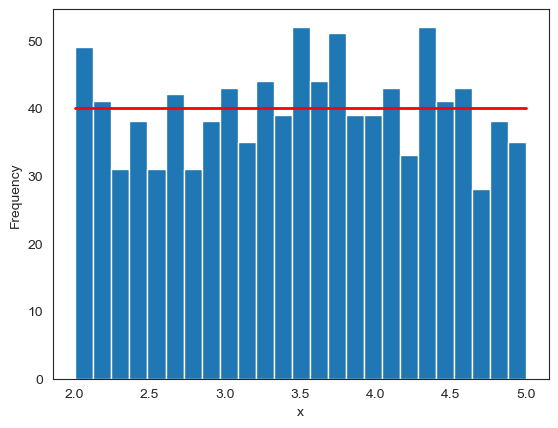

In [24]:
fig, ax = plt.subplots()

freqs, bins, _ = ax.hist(uni1000, bins=25)

# 평균 도수: freqs.mean() = 40.0
ax.plot(bins, np.ones_like(bins) * freqs.mean(), linewidth=2, color='red')

ax.set_xlabel('x')
ax.set_ylabel('Frequency')

plt.show()

**균등분포의 히스토그램과 확률밀도함수**

`plt.hist()` 함수를 호출할 때 `density=True` 키워드 인자를 지정하면 막대 각각의 높이는
막대가 가리키는 구간별 상대도수를 구간의 크기로 나눈 값으로 지정된다.
이렇게 하면 막대로 구성된 전체 구역의 면적이 1이 된다.

:::{admonition} 히스토그램의 막대 높이
:class: note

총 $m$ 개의 데이터 샘플을 $n$개의 구간으로 나눠 히스토그램을 그린다고 하자.
또한 $m_i$는 $i$번째 구간의 도수, $w_i$는 $i$번째 구간의 크기를 가리킨다.

히스토그램을 그릴 때 `density=True` 키워드 인자를 사용하면 $i$번째 구간의 막대 높이 $h_i$는
다음과 같이 해당 구간의 상대도수 $\frac{m_i}{m}$를 해당 구간의 크기 $w_i$로 나눈 값이다.

$$
h_i = \frac{m_i}{m} \cdot \frac{1}{w_i}
$$

그러면 막대 면적의 총합은 다음과 같이 1로 계산된다.

$$
\sum_{i=1}^n h_i \cdot w_i = \sum_{i=1}^n \frac{m_i}{m} \cdot \frac{1}{w_i}\cdot w_i = \sum_{i=1}^n \frac{m_i}{m} = \frac 1 m \cdot \sum_{i=1}^n m_i = \frac m m = 1
$$
:::

예를 들어, 균등분포의 경우, 구간별 밀도 히스토그램에서 구간별 막대 높이는 평균 $\frac{1}{b-a}$로 계산되는데, 그 이유는 다음과 같다.

먼저 $m$는 데이터셋의 크기, $n$은 구간의 개수를 가리킨다고 하자.
그러면 구간별 평균 도수는 $\frac m n$이고, 구간별 평균 상대도수는 $\frac 1 n$이다.
각 구간의 크기는 일정하게 $\frac{b-a}{n}$이므로, 앞서 언급한 막대 높이의 공식에 의해
구간별 막대의 평균 높이는 다음과 같이 $\frac{1}{b-a}$로 계산된다.

$$
\frac{1}{n} \cdot \frac{\;\;\quad1\quad\;\;}{\displaystyle{\frac{b-a}{n}}} = \frac 1 n \cdot \frac{n}{b-a} = \frac{1}{b-a}
$$

따라서 데이터셋의 구간별 밀도를 나타내는 히스토그램은 전체 면적이 1이 되도록 막대
높이가 정의되었다는 점, 단위구간의 상대도수가 크면 막대의 높이와 면적도 커진다는 점에서 확률밀도함수의 그래프를 비슷하게 모방하고 있음을 알 수 있다.

아래 코드는 균등분포 함수로 무작위 추출된 데이터셋을 히스토그램으로 그렸을 때
막대의 평균 높이가 $1/3 = 0.33$에 매우 근접함을 보여준다.
그래프의 빨간 직선은 이론적 평균 막대 높이인 0.333333을,
노란 직선은 이 데이터셋의 실제 평균 막대 높이인 0.334067을 가리킨다.

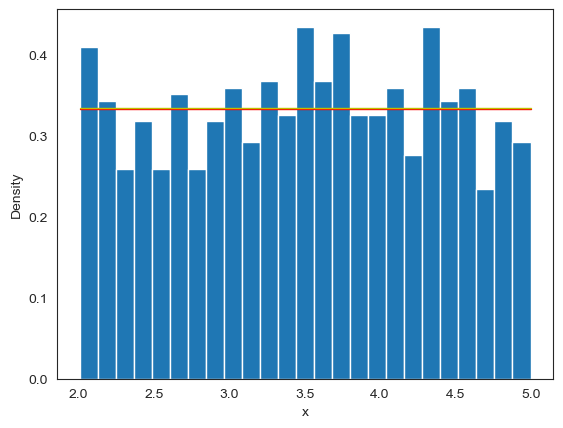

In [25]:
fig, ax = plt.subplots()

dens, bins, _ = ax.hist(uni1000, 25, density=True)

# 이론적 확률밀도함수 그래프: y = 1/(5-2) = 0.333333 (빨간 직선)
ax.plot(bins, np.ones_like(bins)/(5-2), linewidth=1, color='red')

# 실제 평균 밀도: dens.mean() = 0.334067 (노란 직선)
ax.plot(bins, np.ones_like(bins)*dens.mean(), linewidth=1, color='y')

ax.set_xlabel('x')
ax.set_ylabel('Density')

plt.show()

이론적 평균 막대 높이와 실제 평균 막대 높이가 다르게 계산되는 이유는 부동소수점 연산에 기인한다.
앞서 확인한 대로 구간별 실제 평균 도수는
$\frac{1000}{25} = 40$이므로
평균 막대 높이 또한
이론적으로 다음과 같이 1/3로 나와야 한다.

$$
\frac{40}{1000} \cdot \frac{1}{\frac{3}{25}} = \frac{1}{25} \cdot \frac{25}{3} = \frac 1 3
$$

하지만 각 막대의 높이가 저장된 `dens`는 해당 구간의 실제 상대도수를 구간 크기 $3/25$으로 나눈 값을 사용하고, 이 값들의 평균을 계산하기 위해 또다시 부동소수점 연산을 사용하면서 이론 평균값인 1/3과 약간의 오차가 발생하게 된다.

(sec:kde)=
## 커널밀도추정

데이터셋이 주어졌을 때
**커널밀도추정** <font size='2'>kernel density estimation</font>(KDE) 기법을 이용하여
데이터 분포에 대한 확률밀도함수를 구할 수 있다.
여기서는 캘리포니아 데이터셋의 가구소득 분포에 대한 확률밀도함수를
KDE에 기반하여 구현할 수 있음을 보인다.

:::{admonition} KDE 기법 이해
:class: note

여기서는 KDE의 활용 결과만 언급한다.
KDE 기법 자체에 대한 보다 자세한 설명은 위키피디아의
[Kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)를 참고하기 바란다.
:::

### Seaborn 라이브러리

캘리포니아 주택가격 데이터셋의 구역별 가구소득은 부동소수점을 사용하는 연속형 자료형이다.

In [26]:
housing.info()

<class 'pandas.core.series.Series'>
RangeIndex: 19675 entries, 0 to 19674
Series name: median_income
Non-Null Count  Dtype  
--------------  -----  
19675 non-null  float64
dtypes: float64(1)
memory usage: 153.8 KB


앞서 가구소득 확률분포에 대한 누적분포함수를 다음과 같이 정의했다.

```python
def F_income(a):
    mask = housing <= a # a 보다 같거나 작을 때만 1
    return mask.mean()  # 전체 중에 True 인 지역의 비율
```

`F_income()` 함수는 유한 개의 데이터 샘플로 구성된 데이터셋을 이용하여 정의된 함수이므로 미분가능하지 않다.
따라서 이 함수에 미분을 적용하여 가구소득 확률분포에 대한 확률밀도함수를 구할 수는 없다.
하지만, 앞서 살펴보았듯이 구간별 밀도 히스토그램을 통해 가구소득 확률밀도함수의 그래프 형태를 추정할 수는 있다. 따라서 먼저 히스토그램을 그려보고, KDE 기법으로 구한
확률밀도함수의 그래프와 비교해보기로 하자.

아래 코드는 가구소득을 30개의 구간으로 나눠 구간별 밀도를 표현한 히스토그램이다.

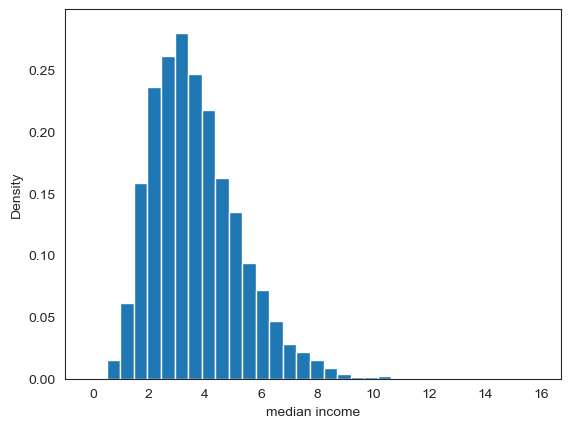

In [27]:
fig, ax = plt.subplots()

# 구간별 밀도 히스토그램
ax.hist(housing, bins=30, density=True) #`density=True`: 상대도수

ax.set_xlim([-1, 16.7])
ax.set_ylim([0.0, 0.299])

ax.set_xlabel('median income')
ax.set_ylabel('Density')

plt.show()

**Seaborn 라이브러리의 `kdeplot()` 함수**

아래 코드의 `sns.kdeplot()` 함수는
가우스 커널 기반의 밀도 추정 기법(Gaussian KDE)을 활용해 **추정한** 확률밀도함수의 그래프를 그린다.

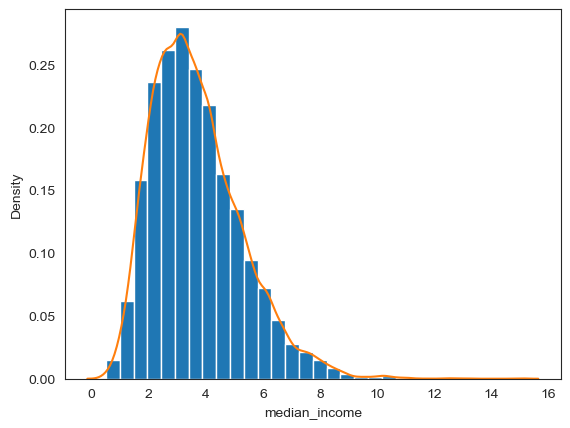

In [28]:
fig, hx = plt.subplots()

# 구간별 밀도 히스토그램
hx.hist(housing, bins=30, density=True)

# 추정된 확률밀도함수 그래프
kde = sns.kdeplot(ax=hx, data=housing)

plt.show()

가우스 KDE 기법으로 추정된 확률밀도함수는 모든 실수에 대해 정의된다.
데이터의 범위 내에서만 확률밀도함수의 그래프를 그리려면 `sns.kdeplot()` 함수를 호출할 때 `cut=0` 키워드 인자를 지정하면 된다.

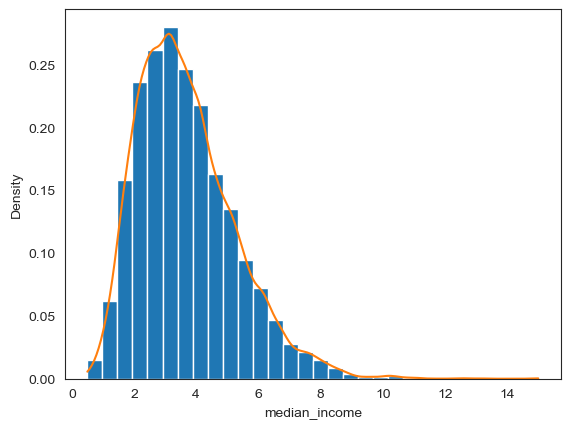

In [29]:
fig, hx = plt.subplots()

# 구간별 밀도 히스토그램
hx.hist(housing, bins=30, density=True)

# 추정된 확률밀도함수 그래프
kde = sns.kdeplot(ax=hx, data=housing, cut=0)

plt.show()

하지만 여기서는 `cut` 키워드 인자를 지정하지 않고
확률밀도함수를 추정된 그대로 사용한다.

아래 코드는 확률밀도함수 그래프만 따로 확인한다.
그래프의 곡선이 일부 구간에서 급격하게 변해서 조금 부자연스러워 보인다.

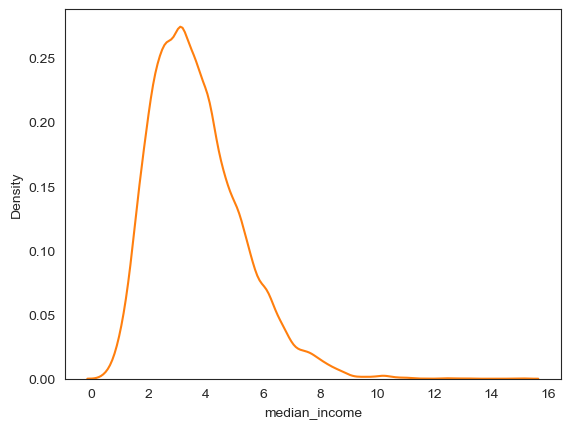

In [30]:
fig, hx = plt.subplots()

# 추정된 확률밀도함수 그래프
kde = sns.kdeplot(ax=hx, data=housing, color='tab:orange')

plt.show()

참고로 `sns.kdeplot()` 함수의 반환값은 `matplotlib.axes._axes.Axes` 클래스의 객체이고 그래프의 모든 정보를 담고 있다.
예를 들어 확률밀도함수 그래프의 좌표 정보는 아래와 같이 구한다.

In [31]:
xs, ys = kde.get_lines()[0].get_data()

이렇게 얻어진 좌표를 이용하여 그래프를 그리면 동일한 확률밀도함수 그래프를 얻는다.

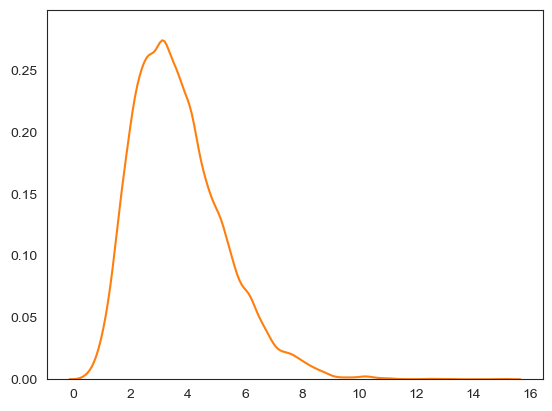

In [32]:
fig, ax = plt.subplots()

ax.plot(xs, ys, color='#ff7f0e')
ax.set_ylim([0.0, 0.299])

plt.show()

`bw_method=0.19` 키워드 인자를 사용하면 추정된 확률밀도함수의 그래프가 부드러워진다.

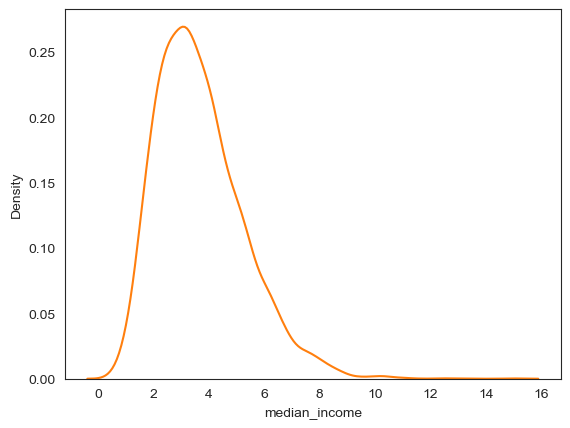

In [33]:
fig, hx = plt.subplots()

# 추정된 확률밀도함수 그래프
kde = sns.kdeplot(ax=hx, data=housing, color='tab:orange', bw_method=0.19)

plt.show()

이제 구간별 밀도 히스토그램과 함께 그리면 자연스럽게 막대들의 끝을 따라 부드럽게 움직이는 것처럼 보인다.

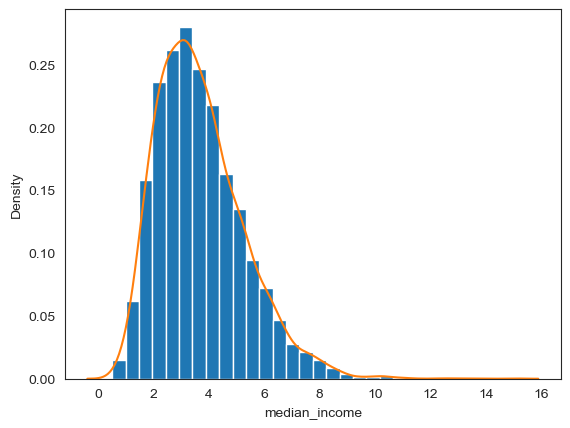

In [34]:
fig, hx = plt.subplots()

# 구간별 밀도 히스토그램
hx.hist(housing, bins=30, density=True)

# 추정된 확률밀도함수 그래프
kde = sns.kdeplot(ax=hx, data=housing, bw_method=0.19)

plt.show()

`bw_method` 변수는 평활모수<font size='2'>smoothing parameter, bandwidth</font>라고 불리는 값을 인자로 받는다.
기본 인자는 주어진 데이터를 활용해 자동으로 적절한 값으로 지정된다.
이 값을 크게 지정할수록 확률밀도함수 그래프의 곡선이 부드럽고 평평해진다는 점은 기억해 두어야 한다.

마지막으로 `bw_method=1`로 지정한 경우를 살펴보면, KDE에 의해 추정된 확률밀도함수가 구간별 밀도 히스토그램과 상당히 다른 형태를 띈다.

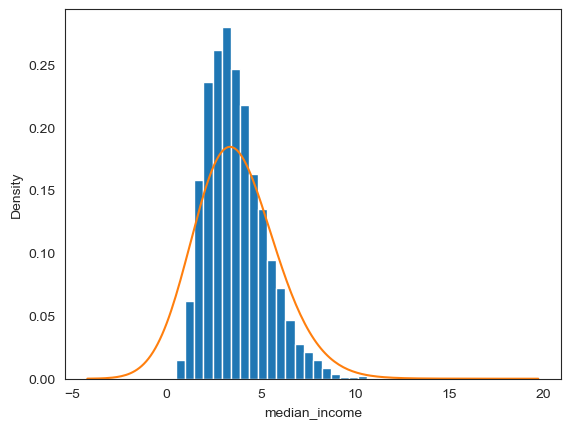

In [35]:
fig, hx = plt.subplots()

# 구간별 밀도 히스토그램
hx.hist(housing, bins=30, density=True)

# 추정된 확률밀도함수 그래프
kde = sns.kdeplot(ax=hx, data=housing, bw_method=1)

plt.show()

가구소득 데이터의 경우엔
자동으로 계산된 `bw_method`의 값보다 `bw_method=0.19`로 지정했을 때가
구간별 밀도 히스토그램과 더 밀착된 그래프 모양을 보여준다.
이렇듯 커널밀도추정 기법은 여러 옵션에 의존하기 때문에 사용자 입장에선 경우에 따라 적절한 옵션을 찾아 
수동으로 지정해줄 필요가 있다.

**Seaborn 라이브러리의 `histplot()` 함수**

`sns.histplot()` 함수는 앞에서 많이 활용해 온 `plt.hist()` 함수와 매개변수명에서는 차이가 있지만 기능은 동일하다. 다만 Seaborn 라이브러리의 특성상 색상이 좀더 옅어진다.

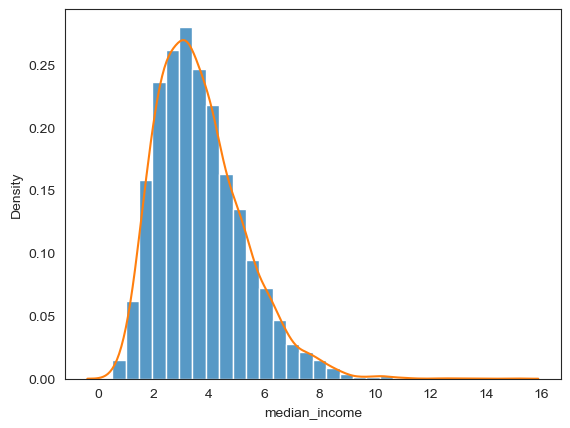

In [36]:
fig, hx = plt.subplots()

# 구간별 밀도 히스토그램
sns.histplot(ax=hx, data=housing, bins=30, stat='density')

# 추정된 확률밀도함수 그래프
kde = sns.kdeplot(ax=hx, data=housing, bw_method=.19, color='tab:orange')

plt.show()

**`scipy.stats` 모듈**

`sns.kdeplot()` 함수는 확률밀도함수 자체를 제공하지 않는다.
하지만 주요 통계 함수를 제공하는 `scipy.stats` 모듈의 `gaussian_kde()` 함수는
`sns.kdeplot()` 함수와 동일한 KDE 기법을 활용하되, 주어진 데이터에 대한 확률밀도함수를 반환한다.

In [37]:
import scipy.stats

아래 코드는 `sns.kdeplot()` 함수를 호출할 때 사용된 `bw_method=0.19`를 동일하게 사용하여
가구소득 분포에 대한 확률밀도함수 `f_income()`을 정의한다.

In [38]:
f_income = scipy.stats.gaussian_kde(housing, bw_method=.19)

이전 그래프에서 사용된 확률밀도함수 그래프와 동일한 그래프를 `f_income()` 함수를 이용하여 그릴 수 있다.

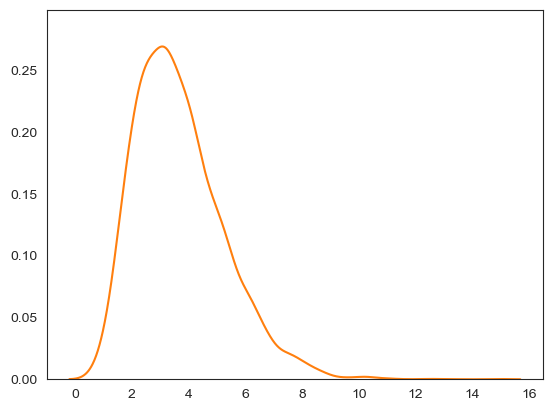

In [39]:
fig, ax = plt.subplots()

xs = np.arange(-0.2, 15.7, 0.01)
ax.plot(xs, f_income(xs), color='#ff7f0e')
ax.set_ylim([0.0, 0.299])

plt.show()

### 확률밀도함수 적분

KDE 기법으로 생성된 확률밀도함수 `f_income()`이
앞서 가구소득 데이터를 이용하여 직접 정의한 `F_income()` 함수의 도함수에 해당한다는 사실을 근사적으로 보일 수 있다.
이를 위해 `F_income(a)`가 `f_income()` 함수를 구간 `[-np.inf, a]`에서 정적분한 값과 매우 유사함을 보인다.
`f_income()` 함수는 KDE 기법으로 이론적으로 추정된 함수이므로 함숫값이 정확히 일치하지는 않는다.

**scipy.integrate 모듈**

정적분을 프로그래밍으로 직접 구현하는 일은 간단하지 않다. 따라서
통계 관련 전문 라이브러리인 SciPy 라이브러리의 `integrate` 모듈에
포함된 `quad()` 함수를 이용한다.

In [40]:
from scipy.integrate import quad

:::{admonition} `scipy.integrate.quad()` 함수
:class: note

`quad()` 함수는 단변수 함수의 정적분을 계산한다.
Fortran 이라는 계산 전용 프로그래밍언어을 위해
개발된 QUADPACK에 포함된 기능을 활용하여 `quad()`라는 이름이 붙었다.
:::

아래 코드는 가구소득의 전체 범위에서 `f_income()` 함수를 정적분한 결과를 보여준다. `quad()` 함수는 정적분값과 함께 계산된 값과 실제 값 사이의 오차를 함께 반환한다. 여기서는 `f_income()` 함수를 정적분했을 때
지정 구간의 확률의 추정치가 계산되는가를 확인하고 오차는 무시한다.

In [41]:
quad(f_income, housing.min(), housing.max())

(0.998388, 0.000000)

아래에 정의된 `P_estimate()` 함수는 `quad()` 함수를 이용하여
$P(a \le X \le b)$를 추정하는 함수다.
즉, 앞서 정의한 `P_income()` 함수의 함숫값을 추정하는 함수이다.

In [42]:
def P_estimate(a, b):
    p, _ = quad(f_income, a, b)
    return p

실수 전체 영역에서는 확률이 1이다.

In [43]:
P_estimate(-np.inf, np.inf)

1.000000

가구소득 전체 범위의 확률은 1보다 아주 조금 작다.
이유는 앞서 추정된 확률밀도함수의 그래프에서 보았듯이
KDE 기법이 반환하는 함수는
데이터 분포의 영역 밖에도 확률밀도가 0보다 큰 영역을 갖기 때문이다.


In [44]:
P_estimate(housing.min(), housing.max())

0.998388

가구소득 범주가 2일 확률, 즉 가구소득이 1.5에서 3.0 사이에 위치할 확률은 다음과 같다.

In [45]:
P_estimate(1.5, 3.0)

0.329210

`P_income()` 함수가 데이터로부터 직접 계산한 확률과 비교하면 역시 약간의 오차만큼 작다.

In [46]:
P_income(1.5, 3.0)

0.333367

`P_estimate()` 함수의 첫째 인자를 음의 무한대로 지정하면
앞서 정의한 누적분포함수인 `F_income()`과 유사한 값을 반환하는지 확인해본다.
예를 들어 가구소득이 3.7 이하일 확률의 추정값은 다음과 같다.

In [47]:
P_estimate(-np.inf, 3.7)

0.561979

반면에 실제 확률은 이보다 약간 더 크다.

In [48]:
F_income(3.7)

0.567217

### 히스토그램과 KDE 기법 활용 기준

지금까지의 설명과 예제를 보면 KDE 기법으로 추정된 확률밀도함수가 데이터셋의 실제 분포를 잘 추정하는 것으로 보인다.
KDE 기법은 그런데 **단봉 분포**<font size='2'>unimodal distribution</font>,
즉 하나의 봉우리만 갖는 형태의 데이터 분포를 갖는 확률변수에 대해서만 제대로 작동한다.
반면에 두 개의 봉우리를 갖는 형태의 **쌍봉 분포**<font size='2'>bimodal distribution</font>,
세 개 이상의 봉우리를 갖는 형태의 **다봉 분포**<font size='2'>multimodal distribution</font>에 대해서는
그렇지 않다.

또한 앞서 보았듯이 KDE 추정 확률밀도함수는 평활모수<font size='2'>bandwidth</font> 인자값에 의존하며, 적절한 평활모수를 정하는 일은 쉽지 않다.
`sns.kdeplot()` 함수처럼 자동으로 적절한 평활모수를 찾아준다 하더라도
히스토그램 그래프를 참고해서 수동으로 조절해 줄 필요가 있는지 판단해야 한다.
단, 히스토그램이 전달하는 정보의 내용은 막대의 개수, 즉 각 구간의 크기에 의존함을 기억해야 한다.
결국 다양한 경우를 확인하여 사용자의 목적에 맞는 적절한 히스토그램과 평활모수를 지정할 필요가 있다.

[(연습) 연속확률분포](https://colab.research.google.com/github/codingalzi/statsRev/blob/master/practices/practice-probability_continuous.ipynb)의
문제 8과 문제 9에서 에제를 통해 히스토그램과 KDE 기법의 활용 기준을 설명한다.

## 결합확률분포

두 연속확률변수 $X$, $Y$가 주어졌을 때 $(X, Y)$는 각 확률변수가 취할 수 있는 값들의 조합을 가리키는 결합확률변수이다.
$(X, Y)$가 특정 영역에서 발생할 가능성의 확률분포를
**연속결합확률분포**<font size='2'>continuous joint probability distribution</font>, 또는 간단히 결합확률분포라 부르며,
$X$가 $a$와 $b$ 사이, $Y$가 $c$와 $d$ 사이의 값을 가질 확률은 다음 세 가지로 표현할 수 있다.

$$
P(a \le X \le b, \; c \le Y \le d)
$$

$$
P(a \le X \le b \; \cap \; c \le Y \le d)ㄴ
$$

$$
P(a \le X \le b\;\;\text{and}\;\; c \le Y \le d)
$$

**예제: 캘리포니아 구역별 가구소득과 주택가격의 결합확률분포**

$X$가 캘리포니아의 구역별 가구소득을,
$Y$가 캘리포니아의 구역별 주택가격을 가리키는 연속확률변수라 하자.
임의로 선택된 구역의 가구소득과 주택가격이 각각 특정 영역에 포함될 확률을
계산하는 연속결합확률분포를 부울 인덱싱을 이용하여 정의할 수 있다.

아래 코드는 캘리포니아 주택가격 데이터셋을 불러온 후에
주택가격이 50만을 초과하는 경우는 삭제하고 인덱스를 초기화한다.
최종적으로 가구소득과 주택가격 두 특성만 남긴다. 주택가격이 소수점 이하는 모두 0이라 정수로, 즉 이산형으로 간주할 수도 있지만,
여기서는 단순하게 부동소수점으로, 즉 연속형 자료형으로 다룬다.

In [49]:
housing = pd.read_csv(data_url+"california_housing.csv")

# 주택가격이 50만1달러 이상인 구역 삭제
house_value_max = housing['median_house_value'].max() # 500,001
mask = housing['median_house_value'] >= house_value_max
housing = housing[~mask]

# 인덱스 초기화
housing = housing.reset_index(drop=True)

# 가구소득 특성만 선택
housing = housing.loc[:, ['median_income', 'median_house_value']]
housing.index.name = 'district'
housing

,median_income,median_house_value
district,,
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
19670,1.5603,78100.0
19671,2.5568,77100.0
19672,1.7000,92300.0


임의로 선택된 구역의 가구소득은 3.0에서 4.5 사이에,
주택가격은 15만에서 25만 사이에 위치할 확률을 계산하기 위해 부울 마스크를 지정한다.

In [50]:
a = 3.0
b = 4.5
c = 150_000
d = 250_000

mask_X = (a <= housing.median_income) & (housing.median_income <= b)
mask_Y = (c <= housing.median_house_value) & (housing.median_house_value <= d)

`pd.crosstab()` 함수를 이용하면 `True`, `False` 조합의 도수로 구성된
`2x2` 행렬 모양의 데이터프레임이 생성된다.

In [51]:
pd.crosstab(mask_X, mask_Y)

median_house_value,False,True
median_income,,
False,8610,3924
True,3763,3378


각 경우의 상대도수를 편하게 계산하기 위해 `margins=True` 키워드 인자를 지정하는 게 좋다.

In [52]:
pd.crosstab(mask_X, mask_Y, margins=True)

median_house_value,False,True,All
median_income,,,
False,8610,3924,12534
True,3763,3378,7141
All,12373,7302,19675


두 특성이 각각 지정된 구간에 포함될 확률은 두 특성이 모두
`True`인 칸에 위치한 값 0.171690, 즉 약 17.2% 정도로 계산된다.

In [53]:
pd.crosstab(mask_X, mask_Y, margins=True) / 19675

median_house_value,False,True,All
median_income,,,
False,0.437611,0.199441,0.637052
True,0.191258,0.171690,0.362948
All,0.628869,0.371131,1.000000


참고로, 현재의 두 구간은 {numref}`%s장 <ch:probability-discrete>`에서 각각 가구소득 3구간,
주택가격 4구간으로 지정되었으며
당시 이산결합확률변수가 각각의 구간에 속할 확률은 0.169911, 즉 약 17%로 계산되었다.

약간의 오차가 발생하는 이유는 이전까지와 마찬가지로,
현재의 데이터셋은 유한 개의 데이터만 포함하므로
확률변수가 특정 실수를 취할 확률이 0이 아니기 때문이다.
실제로 가구소득이 3.0일 확률은 0이 아니다.

In [54]:
mask3 = housing.median_income == 3.0
mask3.mean()

0.001931

이 점을 고려해서 `mask_X`와 `mask_Y`을  {numref}`%s장 <ch:probability-discrete>` 에서 사용한 구간과 동일하게 지정하면,
즉, 구간의 왼쪽 끝을 제외시키면 결과가 0.169911로 이산결합확률분포의 경우와 동일하게 나온다.

In [55]:
mask_X = (a < housing.median_income) & (housing.median_income <= b)
mask_Y = (c < housing.median_house_value) & (housing.median_house_value <= d)
pd.crosstab(mask_X, mask_Y, margins=True) / 19675

median_house_value,False,True,All
median_income,,,
False,0.441017,0.197967,0.638983
True,0.191105,0.169911,0.361017
All,0.632122,0.367878,1.000000


그럼에도 불구하고 여기서는 연속결합확률분포를 계산하고 있으므로,
구간의 왼쪽 끝을 포함하면서 확률을 계산하기로 한다.

**결합확률분포 함수**

앞서 사용한 예제를 일반화하여
가구소득은 $a$ 와 $b$ 사이,
주택가격은 $c$ 와 $d$ 사이의
값을 가질 확률을 계산하는 결합확률분포 함수를
두 개의 부울 마스크를 이용하여 선언한다.

In [56]:
def p_XY(a, b, c, d):
    mask_X = (a <= housing.median_income) & (housing.median_income <= b)
    mask_Y = (c <= housing.median_house_value) & (housing.median_house_value <= d)
    cross_XY = pd.crosstab(mask_X, mask_Y, margins=True)
    total = cross_XY.loc['All', 'All']
    cross_XY_prob = cross_XY / total
    return cross_XY_prob.loc[True, True]

가구소득은 3구간에, 주택가격은 4구간에 속할 확률이
이전과 동일하게 확인된다.

In [57]:
p_XY(a, b, c, d)

0.171690

**결합확률분포 함수의 성질**

두 확률변수가 취할 수 있는 전 영역에서의 결합확률은 1이다.

In [58]:
p_XY(-np.inf, np.inf, -np.inf, np.inf)

1.000000

(sec:kde-multivariate)=
## 다변량 커널밀도추정

데이터셋이 주어졌을 때
**커널밀도추정**<font size='2'>kernel density estimation</font>(KDE) 기법을 이용하여
결합확률분포 함수를 구할 수 있다.

### 결합확률밀도함수

연속확률변수 $X$에 대한 누적분포함수 $F(a)$는
확률밀도함수의 적분으로 정의할 수 있다.

$$
F(a) = P(X \le a) = \int_{-\infty}^{a} f(x)\; dx
$$

마찬가지로, 결합확률변수 $(X, Y)$에 대한 결합확률분포 함수도 결합확률밀도함수의 적분으로 계산할 수 있다.
단, 결합확률밀도함수 $f(x, y)$는 항상 음이 아닌 실수여야 한다.

$$
P(a \le X \le b, \; c \le Y \le d) = \int_{a}^{b} \int_{c}^{d} f(x, y)\; dy\, dx
$$

앞서 활용한
`scipy.stats` 모듈의 `gaussian_kde()` 함수는 결합확률분포에 대해서도
커널밀도추정(KDE) 기법을 적용, 확률밀도함수를 계산한다.
또한 주변확률분포도 이산확률분포의 경우와 유사하게 정의하고 활용할 수 있다.
하지만 기초 수준에서 다루기에는 조금 어려워서 더이상 언급하지 않는다.
대신 결합확률분포의 시각화를 통해 특성들 사이의 상관관계를 확인하는 방법을 간단하게 소개한다.

### 결합확률분포 시각화

Seaborn 라이브러리의 `kdeplot()` 함수를 활용하여
두 개의 확률변수를 결합하는 이변량 결합확률분포를 다양한 방식으로 시각화할 수 있다.

먼저 아래 코드는 결합확률변수의 분포를 등고선 형식으로 그려준다.
안쪽 등고선이 보다 높은 데이터 밀도를 갖는다.

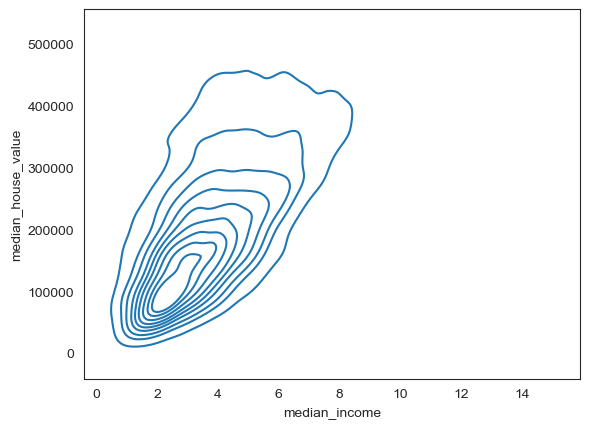

In [59]:
fig, hx = plt.subplots()

# 추정된 확률밀도함수 그래프
sns.kdeplot(ax = hx, data=housing, x="median_income", y="median_house_value")

plt.show()

다음 코드는 데이터 산점도와 확률밀도함수 그래프를 함께 그린다.
산점도와 등고선을 구분하기 위해 등고선 색상을 변경한다. 안쪽 등고선의 영역일수록 많은 데이터가 모여있음을 잘 확인해준다. 특히 `scatter()` 함수의 호출에 쓰인 `alpha=.1` 인자는 점들의 투명도를 조절하기 위한 것인데, `alpha`값이 0에 가까울수록 투명하고 1에 가까울수록 불투명하다. 점들의 투명도를 낮추면 점들이 많이 겹쳐 있는 영역에서 투명한 점들이 여러 개 겹쳐서 더 진한 색으로 보이게 되므로 데이터의 밀집도를 시각적으로 파악하는 데 도움이 된다.



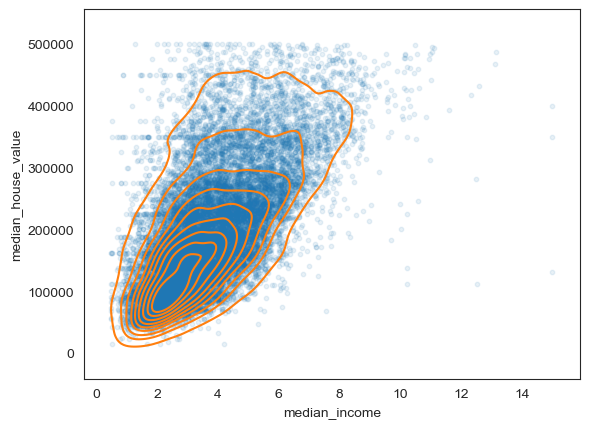

In [60]:
fig, hx = plt.subplots()

# 추정된 확률밀도함수 그래프
sns.kdeplot(ax=hx, data=housing, x="median_income", y="median_house_value", color='tab:orange')

# 데이터 산점도
hx.scatter(housing['median_income'], housing['median_house_value'], alpha=.1, s=10)

plt.show()

`sns.kdeplot()` 함수 자체로 밀도를 색으로 구분해주는 기능이 있다.
또한 색막대를 이용하여 색상에 따른 밀도를 함께 확인할 수도 있다.

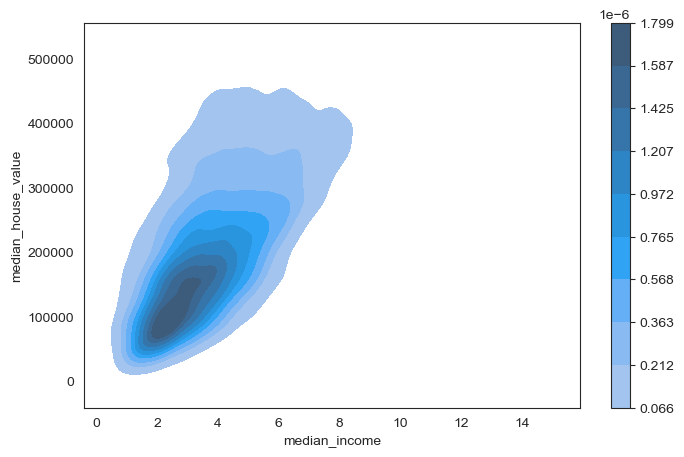

In [61]:
fig, hx = plt.subplots(figsize=(8, 5))

# 추정된 확률밀도함수 그래프
sns.kdeplot(ax = hx, data=housing, x="median_income", y="median_house_value", fill=True, cbar=True)

plt.show()

## Cycler 색상표

`matplotlib.axes._axes.Axes` 클래스는 이미지를 담당하는 객체를 생성할 때 활용된다.
하나의 이미지에 여러 개의 그래프를 구분하며 그릴 때 색을 사용한다.
`matplotlib.pyplot`과 `seaborn` 라이브러리는 하나의 이미지에 여러 개의 그래프를 그릴 때
최대 10개의 색으로 구분한다.
10개 보다 많은 그래프를 하나의 이미지에 그릴 때는 10개의 색이 순환되며,
이런 의미에서 **cycler 색상표**라 부른다.

아래 코드는 한 이미지에 포함된 여러 개의 그래프를 구분하기 위해 사용하는 10개의 색 순서와
색 이름을 문자열과 hex code라 불리는 16진수를 멋진 이미지로 그린다.

:::{admonition} 주의사항
:class: warning

아래 코드는 그래프를 그릴 때 사용되는 색과 색의 코드를 보여주는 용도로만 사용된다.
코드 자체를 이해하지 못해도 상관 없다.
:::

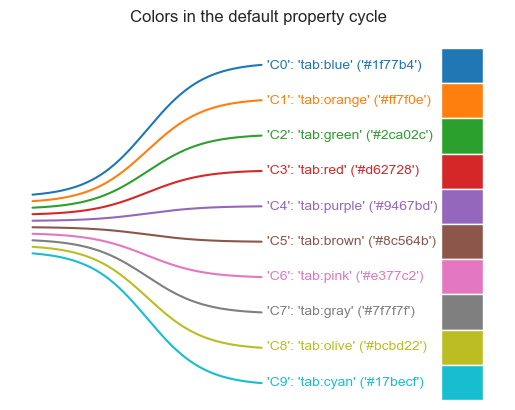

In [62]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import TABLEAU_COLORS, same_color


def sigmoid_like(x, pos):
    """S-자 곡선 함수. 대략적으로 pos 위치에서 끝남."""
    return 0.85 * pos * (1 / (1 + np.exp(-x)) + 0.2)


fig, ax = plt.subplots()
ax.axis('off')
ax.set_title("Colors in the default property cycle")

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
x = np.linspace(-4, 4, 200)

for i, (color, color_name) in enumerate(zip(colors, TABLEAU_COLORS)):
    assert same_color(color, color_name)
    pos = 4.5 - i
    ax.plot(x, sigmoid_like(x, pos))
    ax.text(4.2, pos, f"'C{i}': '{color_name}' ('{color}')", color=color, va="center")
    ax.bar(11, 1, width=1.5, bottom=pos-0.5)

plt.show()

참고로 지금까지 확률밀도함수의 그래프는 모두 Cycler 색상의 두번째(C1)인 주황색(`tab:orange` 또는 `#ff7f0e`)으로 지정되었다.

## 연습문제

참고: [(연습) 연속확률분포](https://colab.research.google.com/github/codingalzi/statsRev/blob/master/practices/practice-probability_continuous.ipynb)